In [ ]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [ ]:
# for model library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# matrics library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
# 1. Data Preprocessing

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/dataset.csv')

In [ ]:
# display first 5rows
df.head()

,Customer_ID,Name,Gender,Age,Country,Subscription_Type,Join_Date,Last_Login,Purchase_Amount,Preferred_Payment_Method,Feedback_Score,Customer_Status
0,CUST1173,Frank,NaN,49.0,Canada,Basic,2018-06-23,2020-06-22,57.31,PayPal,2.0,Churned
1,CUST1274,David,Male,NaN,Australia,Free,2018-10-02,2020-10-01,112.30,Bank Transfer,NaN,Churned
2,CUST1490,David,Female,18.0,USA,Basic,2019-05-06,2021-05-05,437.55,Cryptocurrency,3.0,Churned
3,CUST1072,Bob,Other,21.0,USA,Free,2018-03-14,2020-03-13,432.04,PayPal,5.0,At Risk
4,CUST1305,Bob,Female,65.0,USA,Free,2018-11-02,2020-11-01,NaN,PayPal,1.0,Churned


In [ ]:
# missing value checking
df_missing_value = df.isnull().sum()
df_missing_value

,0
Customer_ID,0
Name,0
Gender,112
Age,50
Country,0
Subscription_Type,0
Join_Date,0
Last_Login,0
Purchase_Amount,51
Preferred_Payment_Method,0


In [ ]:
# Handling Missing value (SimpleImputer)
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df


,Customer_ID,Name,Gender,Age,Country,Subscription_Type,Join_Date,Last_Login,Purchase_Amount,Preferred_Payment_Method,Feedback_Score,Customer_Status
0,CUST1173,Frank,Male,49.0,Canada,Basic,2018-06-23,2020-06-22,57.31,PayPal,2.0,Churned
1,CUST1274,David,Male,50.0,Australia,Free,2018-10-02,2020-10-01,112.3,Bank Transfer,3.0,Churned
2,CUST1490,David,Female,18.0,USA,Basic,2019-05-06,2021-05-05,437.55,Cryptocurrency,3.0,Churned
3,CUST1072,Bob,Other,21.0,USA,Free,2018-03-14,2020-03-13,432.04,PayPal,5.0,At Risk
4,CUST1305,Bob,Female,65.0,USA,Free,2018-11-02,2020-11-01,94.09,PayPal,1.0,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...
500,CUST1106,Eve,Male,18.0,Canada,Free,2018-04-17,2020-04-16,88.64,Cryptocurrency,5.0,Churned
501,CUST1270,Eve,Female,24.0,India,Premium,2018-09-28,2020-09-27,94.09,Bank Transfer,2.0,At Risk
502,CUST1348,Grace,Other,68.0,Germany,Premium,2018-12-15,2020-12-14,58.51,Bank Transfer,3.0,Active
503,CUST1435,Frank,Female,63.0,India,Basic,2019-03-12,2021-03-11,398.53,Credit Card,2.0,Churned


In [ ]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Separating features and target
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

In [ ]:
# Encoding target variable
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

In [ ]:
# Identifying categorical and numerical features(dataset)

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [ ]:
# Preprocessing
scaler = StandardScaler()
if not numerical_features.empty:
    X[numerical_features] = scaler.fit_transform(X[numerical_features]) # Scaling numerical feature

# One-hot encoding for categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [ ]:
# split dataset(Train, Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 2. Model Training
# defining all the models
logictic_reg = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()

In [ ]:
# storing results trained models
trained_models = {}

In [ ]:
# Logistic Regression
logictic_reg.fit(X_train, y_train)
trained_models['Logistic Regression'] = logictic_reg

In [ ]:
# Decision Tree
decision_tree.fit(X_train, y_train)
trained_models['Decision Tree'] = decision_tree

In [ ]:
# Random Forest
random_forest.fit(X_train, y_train)
trained_models['Random Forest'] = random_forest

In [ ]:
# SVM
svm.fit(X_train, y_train)
trained_models['SVM'] = svm

In [ ]:
# KNN
knn.fit(X_train, y_train)
trained_models['KNN'] = knn

In [ ]:
# 3. Model Optimization (RandomizedSearchCV)
# for storing the the tuning models and best_parameters of each model
tuned_models = {}
best_params = {}


In [ ]:
# Logistic Regression (tuning)
param_dist_lr = {
    'C': np.logspace(-3, 2, 30),
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

rs_lr = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_distributions=param_dist_lr,
    n_iter=20, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)

In [ ]:
rs_lr.fit(X_train, y_train)
tuned_models['Logistic Regression'] = rs_lr.best_estimator_
best_params['Logistic Regression'] = rs_lr.best_params_

In [ ]:
# Decision Tree (tuning)
param_dist_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}
rs_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_dt,
    n_iter=25, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)

In [ ]:
rs_dt.fit(X_train, y_train)
tuned_models['Decision Tree'] = rs_dt.best_estimator_
best_params['Decision Tree'] = rs_dt.best_params_

In [ ]:
# Random Forest (tuning)
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rs_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=30, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)


In [ ]:
rs_rf.fit(X_train, y_train)
tuned_models['Random Forest'] = rs_rf.best_estimator_
best_params['Random Forest'] = rs_rf.best_params_


In [ ]:
# SVM (tuning)
param_dist_svc = {
    'C': np.logspace(-2, 2, 20),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
rs_svc = RandomizedSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_distributions=param_dist_svc,
    n_iter=25, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)

In [ ]:
rs_svc.fit(X_train, y_train)
tuned_models['SVM'] = rs_svc.best_estimator_
best_params['SVM'] = rs_svc.best_params_

In [ ]:
# KNN (tuning)
param_dist_knn = {
    'n_neighbors': list(range(3, 51, 2)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
rs_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist_knn,
    n_iter=20, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)
rs_knn.fit(X_train, y_train)
tuned_models['KNN'] = rs_knn.best_estimator_
best_params['KNN'] = rs_knn.best_params_


In [ ]:
# viewing all the best parameters model training
for m, p in best_params.items():
    print(f"{m} best params: {p}")

Logistic Regression best params: {'solver': 'lbfgs', 'penalty': 'l2', 'C': np.float64(0.001)}
Decision Tree best params: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'gini'}
Random Forest best params: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}
SVM best params: {'kernel': 'poly', 'gamma': 'scale', 'C': np.float64(0.29763514416313175)}
KNN best params: {'weights': 'uniform', 'p': 1, 'n_neighbors': 43}


In [ ]:
# 4. Ensemble Learning
# storing ensemble result
ensembles = {}

In [ ]:
# Bagging (Decision Tree)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging.fit(X_train, y_train)
ensembles['Bagging'] = bagging

In [ ]:
# Boosting using AdaBoost
boosting = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)
boosting.fit(X_train, y_train)
ensembles['Boosting'] = boosting


In [ ]:
# Stacking using tuned base learners(RF, SVM, KNN) and one meta learner(Logistic Regression)
stacking = StackingClassifier(
    estimators=[
        ('rf', tuned_models['Random Forest']),
        ('svc', tuned_models['SVM']),
        ('knn', tuned_models['KNN'])
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_jobs=-1,
    passthrough=False
)
stacking.fit(X_train, y_train)
ensembles['Stacking'] = stacking

In [ ]:
# 5. Evaluation For All Models
# storing evaluation model results
evaluation_table_rows = {}
confusion_matrices = {}


In [ ]:
# Evaluation for tuned supervised models
# using loops for simplicty and storing the result
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    evaluation_table_rows[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)


In [ ]:
# Evaluation for ensemble models (using loops)
for name, model in ensembles.items():
    y_pred = model.predict(X_test)
    evaluation_table_rows[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

In [ ]:
# Metrics (One table)
evaluation_table = pd.DataFrame(evaluation_table_rows).T
evaluation_table = evaluation_table[['Accuracy', 'Precision', 'Recall', 'F1 Score']]
display(evaluation_table)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.51,0.260100,0.51,0.344503
Decision Tree,0.44,0.382435,0.44,0.387380
Random Forest,0.51,0.260100,0.51,0.344503
SVM,0.51,0.260100,0.51,0.344503
KNN,0.50,0.394885,0.50,0.382147
Bagging,0.46,0.348069,0.46,0.363540
Boosting,0.51,0.394333,0.51,0.400952
Stacking,0.51,0.260100,0.51,0.344503


In [ ]:
# showing confusion matrices
for name, cm in confusion_matrices.items():
    print(f"\nConfusion Matrix - {name}:\n{cm}")



Confusion Matrix - Logistic Regression:
[[51  0  0]
 [17  0  0]
 [32  0  0]]

Confusion Matrix - Decision Tree:
[[38  2 11]
 [11  2  4]
 [26  2  4]]

Confusion Matrix - Random Forest:
[[51  0  0]
 [17  0  0]
 [32  0  0]]

Confusion Matrix - SVM:
[[51  0  0]
 [17  0  0]
 [32  0  0]]

Confusion Matrix - KNN:
[[47  0  4]
 [17  0  0]
 [29  0  3]]

Confusion Matrix - Bagging:
[[43  1  7]
 [17  0  0]
 [27  2  3]]

Confusion Matrix - Boosting:
[[47  0  4]
 [15  0  2]
 [28  0  4]]

Confusion Matrix - Stacking:
[[51  0  0]
 [17  0  0]
 [32  0  0]]


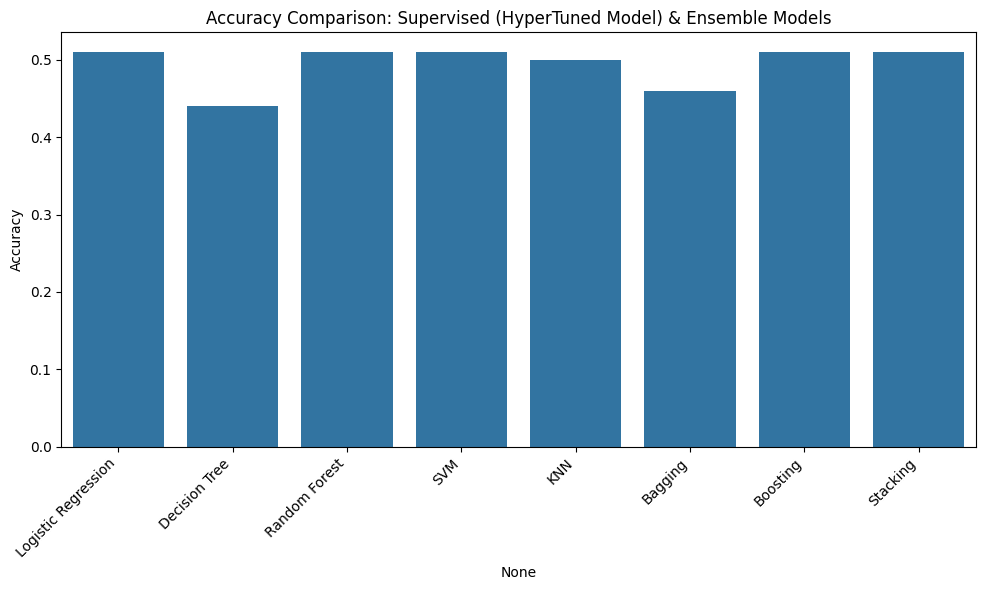

In [ ]:
# 6. Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=evaluation_table.index, y=evaluation_table['Accuracy'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Supervised (HyperTuned Model) & Ensemble Models')
plt.tight_layout()
plt.show()

In [ ]:
# 7. Conclusion (showing the best model name and resuls)
best_model_name = evaluation_table['Accuracy'].idxmax()
best_acc = evaluation_table.loc[best_model_name, 'Accuracy']
print(f"Best performed model name: {best_model_name} and ( Accuracy = {best_acc:.4f})")

Best performed model name: Logistic Regression and ( Accuracy = 0.5100)


In [ ]:
# Comment:
# Logistic Regression, a linear model, performed better than more complex models Like (Random Forest, SVM, Decision Tree) on this dataset